# Markov Chain Monte Carlo (MCMC) Example
Sampling Multimodal Distributions from Uniform Distribution using MCMC

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## MCMC Algorithm

In [2]:
# Markov Chain Monte Carlo (MCMC) sampler
def MCMC(num_samples: int, step_size: float, action: callable, show_info=True) -> np.ndarray:
    # initialization
    x = 0.0
    num_accepted_samples = 0
    x_samples = np.zeros(num_samples)

    # set random seed using current time
    np.random.seed()

    # generate samples
    for i in range(num_samples):

        # keep previous x
        prev_x = x

        # keep current action
        action_init = action(x)

        # propose a new x
        delta_x = np.random.uniform(-step_size, step_size)
        x = x + delta_x

        # calculate new action
        action_fin = action(x)

        # decide whether to accept or reject the new x (Metropolis-Hastings algorithm)
        if np.random.uniform() < np.exp(action_init - action_fin):
            # accept the new x
            num_accepted_samples += 1
        else:
            # reject the new x
            x = prev_x

        # store the sample
        x_samples[i] = x

    if show_info:
        # print the acceptance rate
        print('Number of all samples:', num_samples)
        print('Number of accepted samples:', num_accepted_samples)
        print('Acceptance rate:', 100.0 * num_accepted_samples / num_samples, '%')

    return x_samples

# [Ex. 1] Unimodal Distribution

Number of all samples: 100000
Number of accepted samples: 90002
Acceptance rate: 90.002 %


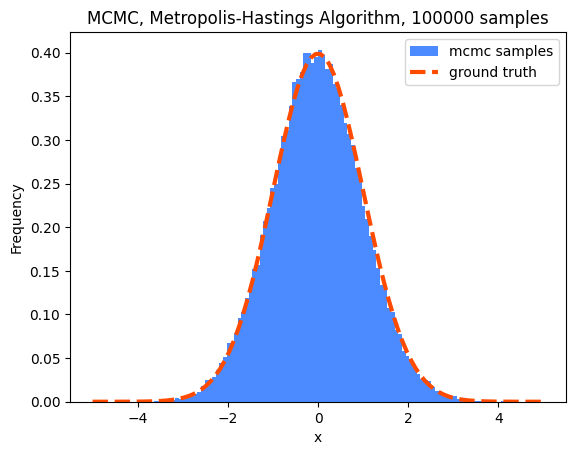

In [3]:
# define the action
def action(x: float) -> float:
    return 0.5 * x**2

# run mcmc and get samples
num_samples = 100000
step_size = 0.5
x_samples = MCMC(
    num_samples=num_samples,
    step_size=step_size,
    action=action,
    show_info=True
)

# visualize the samples as a histogram
plt.hist(x_samples, bins=100, density=True, color='#005AFF', alpha=0.7, label='mcmc samples') # blue bars
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('MCMC, Metropolis-Hastings Algorithm, {0} samples'.format(num_samples))

# plot the ground truth probability density function
x = np.linspace(-5.0, +5.0, 100)
x_step_len = x[1] - x[0]
y = np.zeros(len(x))
Z = 0.0 # normalization constant
for i in range(len(x)):
    y[i] = np.exp(-1.0 * action(x[i]))
    Z += y[i] * x_step_len
y /= Z # normalization
plt.plot(x, y, color='#FF4B00', linewidth=3, linestyle='--', label='ground truth') # orange dashed line

# set the legend
plt.legend()

# show (and save) the plot
# plt.savefig('mcmc_1d_unimodal.png', dpi=300)
plt.show()

## [Ex.2] Multimodal Distribution

Number of all samples: 100000
Number of accepted samples: 52243
Acceptance rate: 52.243 %


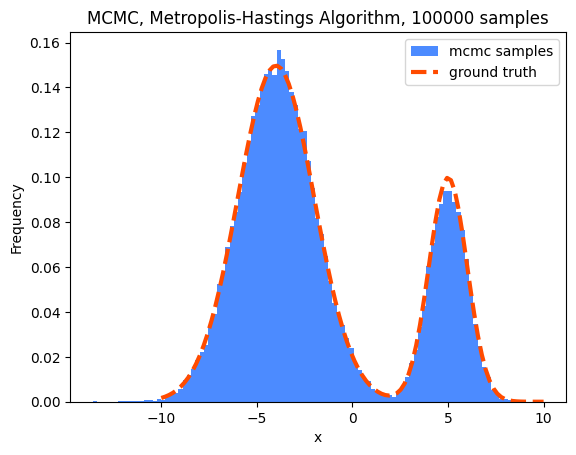

In [4]:
# define the action
def action(x: float) -> float:
    return -np.log(1.5*np.exp(-0.5*(0.5*x+2.0)**2) + np.exp(-0.5*(1.0*x-5.0)**2))

# run mcmc and get samples
num_samples = 100000
step_size = 5.0
x_samples = MCMC(
    num_samples=num_samples,
    step_size=step_size,
    action=action,
    show_info=True
)

# visualize the samples as a histogram
plt.hist(x_samples, bins=100, density=True, color='#005AFF', alpha=0.7, label='mcmc samples') # blue bars
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('MCMC, Metropolis-Hastings Algorithm, {0} samples'.format(num_samples))

# plot the ground truth probability density function
x = np.linspace(-10.0, +10.0, 100)
x_step_len = x[1] - x[0]
y = np.zeros(len(x))
Z = 0.0 # normalization constant
for i in range(len(x)):
    y[i] = np.exp(-1.0 * action(x[i]))
    Z += y[i] * x_step_len
y /= Z # normalization
plt.plot(x, y, color='#FF4B00', linewidth=3, linestyle='--', label='ground truth') # orange dashed line

# set the legend
plt.legend()

# show (and save) the plot
# plt.savefig('mcmc_1d_multimodal.png', dpi=300)
plt.show()